# CO2-H2O System
[<!-- module-ltg badge --><span class="module module-ltg">Low-Temperature Geochemistry</span>](module-ltg) 
```{index} CO2-H2O System
```

In this session, we will derive the governing equations of the $CO_2$-$H_2O$ system under closed and open system conditions.

In [3]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [4]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

Consider the dissociation of a weak poly-protic acid ($H_2CO_3$) in water at $25^\circ C$ and an atmospheric pressure of $1$ bar. 

(1) $H_2CO_3$ dissociates to form hydrogen ions ($H^+$) and bicarbonate ions ($HCO_{3}^{-}$)

$$H_2CO_3 = HCO_{3}^{-} + H^+$$

$$K_1 = \frac{a_{H^+} \cdot a_{HCO_{3}^{-}}}{a_{H_2CO_3}} = 10^{-6.35}$$ (eq1)

(2) $HCO_{3}^{-}$ dissociates to form hydrogen ions and carbonate ions ($CO_{3}^{2-}$)

$$HCO_{3}^{-} = CO_{3}^{2-} + H^+$$

$$K_2 = \frac{a_{H^+} \cdot a_{CO_{3}^{2-}}}{a_{HCO_{3}^{-}}} = 10^{-10.33}$$ (eq2)

(3) Dissociation of water

$$H_2O = H^+ + OH^-$$

$$K_W = \frac{a_{H^+} \cdot a_{OH^-}}{a_{H_2O}} = 10^{-14}$$ (eq3)

(4) Charge balance (all solutions are electrically neutral). Note that we need to balance concentrations ($m$), not activities ($a$), as concentrations represent actual quantities of ions.

$$m_{H^+} = m_{HCO_{3}^{-}} + 2m_{CO_{3}^{2-}} + m_{OH^-}$$ (eq4)

Now we have $5$ unknowns ($m_{H^+}, m_{H_2CO_3}, m_{HCO_{3}^{-}}, m_{CO_{3}^{2-}}, m_{OH^-}$) but only $4$ equations. We need the fifth equation in order to solve the simultaneous equations. Fortunately, we can get it from the boundary conditions, i.e. what we know about the system.

For a closed system, the boundary condition is that the total amount of $CO_2$ in the system is fixed. As $H_2CO_3$, $HCO_{3}^{-}$, and $CO_{3}^{2-}$ form when $CO_2$ dissolves in water, so

$$m_{total} = m_{H_2CO_3} + m_{HCO_{3}^{-}} + m_{CO_{3}^{2-}} $$ (eq5)

Recalling the relationship between concentration and activity:

$$m_i = \frac{a_i}{y_i}$$

We will assume that $y_{H_2CO_3} = y_{HCO_{3}^{-}} = y_{CO_{3}^{2-}} = y_{OH^-} = 1$, so $m_i = a_i$.

And recall that

$$pH = -\log(m_{H^+}) \quad \longrightarrow \quad m_{H^+}=10^{-pH}$$

From {eq}`eq1`, $m_{H^+}=10^{-pH}$, rearranging it and using the assumption, we get:

$$m_{HCO_{3}^{-}} = \frac{K_1 \cdot m_{H_2CO_3}}{10^{-pH}}$$ (eq1')

From $m_{H^+}=10^{-pH}$, {eq}`eq2` and {eq}`eq1'`, using the assumption, we get:

$$m_{CO_{3}^{2-}} = \frac{K_2 \cdot K_1 \cdot m_{H_2CO_3}}{10^{-2 \cdot pH}}$$ (eq2')

Substituting {eq}`eq1'` and {eq}`eq2'` into {eq}`eq5`, we get:

$$m_{total} = m_{H_2CO_3} + \frac{K_1 \cdot m_{H_2CO_3}}{10^{-pH}} + \frac{K_2 \cdot K_1 \cdot m_{H_2CO_3}}{10^{-2 \cdot pH}}$$

$$m_{total} = m_{H_2CO_3} \left(\frac{K_1}{10^{-pH}} + \frac{K_2 \cdot K_1}{10^{-2 \cdot pH}}\right)$$

$$m_{H_2CO_3} = \frac{m_{total}}{\left(\frac{K_1}{10^{-pH}} + \frac{K_2 \cdot K_1}{10^{-2 \cdot pH}}\right)}$$

We will define a new parameter $F_H$ as

$$F_H = \frac{K_1}{10^{-pH}} + \frac{K_2 \cdot K_1}{10^{-2 \cdot pH}}$$

So,

$$m_{H_2CO_3} = \frac{m_{total}}{F_H}$$ (eqa)

Substituting {eq}`eqa` into {eq}`eq1'` and {eq}`eq2'`, we get:

$$m_{HCO_{3}^{-}} = \frac{m_{total} \cdot K_1}{F_H \cdot 10^{-pH}}$$ (eqb)

$$m_{CO_{3}^{2-}} = \frac{m_{total} \cdot K_2 \cdot K_1}{F_H \cdot 10^{-2 \cdot pH}}$$ (eqc)

The derivations of {eq}`eqa`, {eq}`eqb` and {eq}`eqc` lead to the speciation of the carbon system as a
function of $pH$, as shown below.

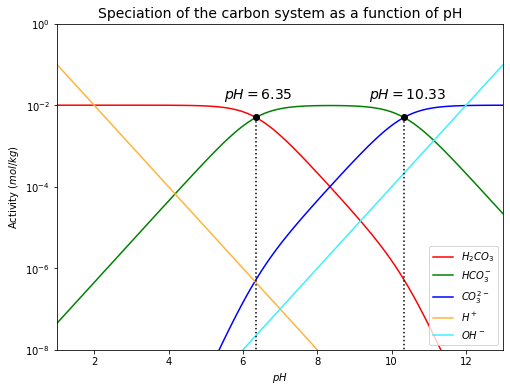

In [5]:
# function for calculating F_H, m_H2CO3, m_HCO3-, m_CO3--, m_H+, m_OH-
def FH(pH):
    K1 = 10**-6.35
    K2 = 10**-10.33
    return 1+(K1/(10**-pH))+(K2*K1/(10**(-2*pH)))

def m_H2CO3(m_total, pH):
    return m_total/FH(pH)

def m_HCO3(m_total, pH):
    K1 = 10**-6.35
    return m_total*K1/(FH(pH)*(10**-pH))

def m_CO3(m_total, pH):
    K1 = 10**-6.35
    K2 = 10**-10.33
    return m_total*K2*K1/(FH(pH)*(10**(-2*pH)))

def m_H(pH):
    return 10**-pH

def m_OH(pH):
    return 10**-(14-pH)

# plot
plt.figure(figsize=(8,6))
m_total = 0.01  # set m_total value
pH = np.linspace(1, 13, 100)
plt.plot(pH, m_H2CO3(m_total, pH), 'r', label='$H_2CO_3$')  # H2CO3
plt.plot(pH, m_HCO3(m_total, pH), 'g', label='$HCO_{3}^{-}$')  # HCO3-
plt.plot(pH, m_CO3(m_total, pH), 'b', label='$CO_{3}^{2-}$')  # CO3--
plt.plot(pH, m_H(pH), '#FFB53C', label='$H^+$')  # H+
plt.plot(pH, m_OH(pH), '#3CF0FF', label='$OH^-$')  # OH-
plt.plot(6.35, m_H2CO3(m_total, 6.35), 'ko')  # the point where m_H2CO3=m_HCO3-
plt.plot([6.35, 6.35], [0, m_H2CO3(m_total, 6.35)], 'k:')
plt.text(5.5, 0.015, '$pH=6.35$', fontsize=14)
plt.plot(10.33, m_HCO3(m_total, 10.33), 'ko')  # the point where m_HCO3-=m_CO3--
plt.plot([10.33, 10.33], [0, m_HCO3(m_total, 10.33)], 'k:')
plt.text(9.4, 0.015, '$pH=10.33$', fontsize=14)
plt.xlabel('$pH$')
plt.ylabel('Activity $(mol/kg)$')
plt.xlim([1, 13])
plt.ylim([10**-8, 1])
plt.yscale("log")
plt.title('Speciation of the carbon system as a function of pH', fontsize=14)
plt.legend(loc='best', fontsize=10)

From the plot above, it can be seen that there are two points where the concentrations (activities) of two carbon-bearing species are equal.

1) $m_{H_2CO_3} = m_{HCO_{3}^{-}}$

$$\frac{(a)}{(b)} = \frac{m_{H_2CO_3}}{m_{HCO_{3}^{-}}} = \frac{\left(\frac{m_{total}}{F_H}\right)}{\left(\frac{m_{total} \cdot K_1}{F_H \cdot 10^{-pH}}\right)} = \frac{10^{-pH}}{K_1}$$

$\quad$If $m_{H_2CO_3} = m_{HCO_{3}^{-}}$, so
    
$$\frac{10^{-pH}}{K_1} = 1$$

$$\therefore pH = pK_1 = 6.35$$

2) $m_{HCO_{3}^{-}} = m_{CO_{3}^{2-}}$

$$\frac{(b)}{(c)} = \frac{m_{HCO_{3}^{-}}}{m_{CO_{3}^{2-}}} = \frac{\left(\frac{m_{total} \cdot K_1}{F_H \cdot 10^{-pH}}\right)}{\left(\frac{m_{total} \cdot K_2 \cdot K_1}{F_H \cdot 10^{-2 \cdot pH}}\right)} = \frac{10^{-pH}}{K_2}$$

$\quad$If $m_{HCO_{3}^{-}} = m_{CO_{3}^{2-}}$, so
    
$$\frac{10^{-pH}}{K_2} = 1$$

$$\therefore pH = pK_2 = 10.33$$

Next, we will consider an open system at $25^\circ C$ and an atmospheric pressure of $1$ bar with a constant atmospheric partial pressure of $CO_2$ ($pCO_2$)

Some $CO_2$ in the air will dissolve in water. The amount of dissolved $CO_2$ follows Henry's law.

$$K_H \cdot pCO_2 = (CO_2)_{aq}$$

\begin{equation*} 
K_H = \frac{a_{(CO_2)_{aq}}}{P_{CO_2}}
\label{Henry_CO2} \tag{5}
\end{equation*}

Some dissolved $CO_2$ will react with water to form carbonic acid:

$$(CO_2)_{aq} + H_2O = H_2CO_3$$

\begin{equation*} 
K_0 = \frac{a_{H_2CO_3}}{a_{(CO_2)_{aq}} \cdot a_{H_2O}} = \frac{a_{H_2CO_3}}{a_{(CO_2)_{aq}}}
\label{form_H2CO3} \tag{6}
\end{equation*}

Rearranging $(5)$ and $(6)$, we get:

\begin{equation*} 
a_{(CO_2)_{aq}} = K_H \cdot P_{CO_2}
\label{a_CO2} \tag{5'}
\end{equation*}

\begin{equation*} 
a_{H_2CO_3} = K_0 \cdot a_{(CO_2)_{aq}}
\label{a_H2CO3} \tag{6'}
\end{equation*}

Substituting $(5')$ into $(6')$, we get:

\begin{equation*} 
a_{H_2CO_3} = K_0 \cdot K_H \cdot P_{CO_2}
\label{a_H2CO3_final} \tag{6''}
\end{equation*}

Combine both of the carbon-bearing species in water as $H_2CO_3^*$

\begin{align} 
a_{H_2CO_3^* } &= a_{(CO_2)_{aq}} + a_{H_2CO_3} \\ 
&= K_H \cdot P_{CO_2} + K_0 \cdot K_H \cdot P_{CO_2} \\
&= K_H \cdot (1+K_0) \cdot P_{CO_2}
\end{align} 

In reality, $K_H >> K_0$, so $a_{(CO_2)_{aq}} >> a_{H_2CO_3}$, and

$$a_{H_2CO_3^*} \approx K_H \cdot P_{CO_2}$$

Recall (1), (2), (3), (4), (5), but rewrite (1) and (5):

$$H_2CO_3^* = HCO_{3}^{-} + H^+$$

\begin{equation*} 
K_1 = \frac{a_{H^+} \cdot a_{HCO_{3}^{-}}}{a_{H_2CO_3^{* }}} = 10^{-6.35}
\label{dis_H2CO3*} \tag{1*}
\end{equation*}

\begin{equation*} 
 K_2 = \frac{a_{H^+} \cdot a_{CO_{3}^{2-}}}{a_{HCO_{3}^{-}}} = 10^{-10.33}
\label{dis_HCO3} \tag{2}
\end{equation*}

\begin{equation*} 
 K_W = \frac{a_{H^+} \cdot a_{OH^-}}{a_{H_2O}} = 10^{-14}
\label{dis_H2O} \tag{3}
\end{equation*}

\begin{equation*} 
 m_{H^+} = m_{HCO_{3}^{-}} + 2m_{CO_{3}^{2-}} + m_{OH^-}
\label{charge_balance} \tag{4}
\end{equation*}

$$K_H \cdot pCO_2 = H_2CO_3^{* }$$

\begin{equation*} 
K_H = \frac{a_{H_2CO_3^{* }}}{P_{CO_2}} \quad \longrightarrow \quad a_{H_2CO_3^{* }} = K_H \cdot P_{CO_2}
\label{Henry_H2CO3*} \tag{5*}
\end{equation*}

Substituting $\eqref{Henry_H2CO3*}$ into $\eqref{dis_H2CO3*}$, and rearranging, we get:

\begin{equation*} 
a_{HCO_{3}^{-}} = \frac{K_1 \cdot K_H \cdot P_{CO_2}}{a_{H^+}}
\label{a_HCO3} \tag{d}
\end{equation*}

Substituting $\eqref{a_HCO3}$ into $\eqref{dis_HCO3}$, and rearranging, we get:

\begin{equation*} 
a_{CO_{3}^{2-}} = \frac{K_2 \cdot K_1 \cdot K_H \cdot P_{CO_2}}{a_{H^+}^2}
\label{a_CO3} \tag{e}
\end{equation*}

Rearranging $\eqref{dis_H2O}$, we get:

\begin{equation*} 
a_{OH^-} = \frac{K_W}{a_{H^+}}
\label{a_OH} \tag{f}
\end{equation*}

Applying $m_i = \frac{a_i}{y_i}$ to $\eqref{charge_balance}$, we get:

$$\frac{a_{H^+}}{y_{H^+}} = \frac{a_{HCO_{3}^{-}}}{y_{HCO_{3}^{-}}} + 2\cdot\frac{a_{CO_{3}^{2-}}}{y_{CO_{3}^{2-}}} + \frac{a_{OH^-}}{y_{OH^-}}$$

Substituting $\eqref{a_HCO3}$, $\eqref{a_CO3}$ and $\eqref{a_OH}$, we get:

$$\frac{1}{y_{H^+}} \left(a_{H^+}\right) = \frac{1}{y_{HCO_{3}^{-}}} \left(\frac{K_1 \cdot K_H \cdot P_{CO_2}}{a_{H^+}}\right) + \cdot\frac{2}{y_{CO_{3}^{2-}}} \left(\frac{K_2 \cdot K_1 \cdot K_H \cdot P_{CO_2}}{a_{H^+}^2}\right) + \frac{1}{y_{OH^-}} \left(\frac{K_W}{a_{H^+}}\right)$$

$y_{H^+}, y_{HCO_{3}^{-}}, y_{CO_{3}^{2-}}$, and $y_{OH^-}$ can be calculated, but ...

   * Calculation depends on ionic strength,
   * …which depends on concentration of ions,
   * …which we don’t know

This can be solved “iteratively”, but we won’t cover this technique here.

We will here assume $y_{H^+} = y_{HCO_{3}^{-}} = y_{CO_{3}^{2-}} = y_{OH^-} = 1$, so

$$a_{H^+} = \left(\frac{K_1 \cdot K_H \cdot P_{CO_2}}{a_{H^+}}\right) + 2\cdot\left(\frac{K_2 \cdot K_1 \cdot K_H \cdot P_{CO_2}}{a_{H^+}^2}\right) + \left(\frac{K_W}{a_{H^+}}\right)$$

If multiplying this equation by $a_{H^+}^2$, we will get a cubic equation $a_{H^+}^3 - B \cdot a_{H^+} + C = 0$ that can be solved exactly. However, we can simplify it using a few assumptions.

1) $K_1>>K_2$

2) By $\eqref{charge_balance}$, $m_{OH^-}<m_{H^+}$ in the presence of any $HCO_3^-$ or $CO_3^{2-}$

By the assumptions, the last two terms are then negligible, and the equation becomes:

$$a_{H^+}^2 = K_1 \cdot K_H \cdot P_{CO_2}$$

For pure water, $K_H=10^{-1.47}$, $K_1=10^{-6.35}$, and $K_2=10^{-10.33}$.

Given that $P_{CO_2} = 409\,ppm = 10^{-3.39}$, 

$$a_{H^+}^2 = 10^{-6.35} \cdot 10^{-1.47} \cdot  10^{-3.39}$$

$$\therefore a_{H^+} = 10^{-5.61} \longrightarrow pH = 5.61$$

**This indicates that water in equilibrium with atmospheric $CO_2$ is acidic! If rain has a pH < 5.61, it is “acid” rain.**

We can also find the activities of other species.

By $\eqref{a_HCO3}$, $a_{HCO_{3}^{-}} = 10^{-5.61} \,mol/kg$

By $\eqref{a_CO3}$, $a_{CO_{3}^{2-}} = 10^{-10.33} \,mol/kg$

By $\eqref{a_OH}$, $a_{OH^{-}} = 10^{-8.39} \,mol/kg$

By $\eqref{Henry_H2CO3*}$, $a_{H_2CO_3^{* }} = 10^{-4.86} \,mol/kg$


Consider the equation below again:

$$a_{H^+}^2 = K_1 \cdot K_H \cdot P_{CO_2}$$

Taking negative 10-base log, we get:

\begin{align} 
-\log(a_{H^+}^2) &= -log(K_1 \cdot K_H \cdot P_{CO_2}) \\ 
2 \cdot pH &= pK_1 + pK_H - \log P_{CO_2} \\
pH &= -\frac{1}{2}\log P_{CO_2} + c
\end{align}

where $c = \frac{pK_1 + pK_H}{2}$

Then, we can plot the relationship between $P_{CO_2}$ and $pH$ of water at equilibrium with atmospheric $CO_2$ as follows.

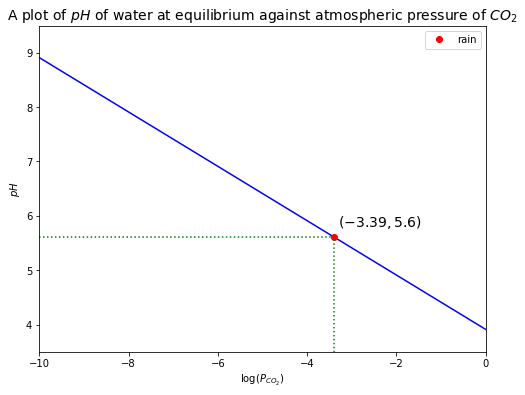

In [6]:
# function for calculating F_H, m_H2CO3, m_HCO3-, m_CO3--, m_H+, m_OH-
def pH_eq(pCO2):
    pK1 = 6.35
    pKH = 1.47
    c = (pK1+pKH)/2
    return -0.5*np.log10(pCO2) + c

# plot
plt.figure(figsize=(8,6))
pCO2 = np.linspace(10**-10, 1, 100)
log_pCO2_rain = -3.39
pH_rain = pH_eq(10**-3.39)
plt.plot(np.log10(pCO2), pH_eq(pCO2), 'b')
plt.plot(log_pCO2_rain, pH_rain, 'ro', label='rain')  # rain
plt.plot([log_pCO2_rain, log_pCO2_rain], [0, pH_rain], 'g:')
plt.plot([-10, log_pCO2_rain], [pH_rain, pH_rain], 'g:')
plt.text(-3.3, 5.8, r'$({0:.2f},{1:.1f})$'.format(log_pCO2_rain, pH_rain), fontsize=14)
plt.xlim([-10, 0])
plt.ylim([3.5, 9.5])
plt.xlabel('$\log(P_{CO_2})$')
plt.ylabel('$pH$')
plt.title('A plot of $pH$ of water at equilibrium against atmospheric pressure of $CO_2$', fontsize=14)
plt.legend(loc='best', fontsize=10)

## Lesson 4 - Problem 2

a) Use the main relations linking the carbon system species to calculate the relative activity between $H_2CO_3$ and $HCO_3^-$ under the following conditions using the data in the table below:

$\quad$(i) At $25^\circ C$ for a water sample whose $pH=4.0$.

$\quad$(ii) At $60^\circ C$ for a water sample whose $pH=4.0$. How different is that from your previous answer in part i)?

In [7]:
# Table

# data
T = [0, 5, 10, 15, 20, 25, 30, 45, 60]
pK1 = [6.58, 6.52, 6.46, 6.42, 6.38, 6.35, 6.33, 6.29, 6.29]
pK2 = [10.63, 10.55, 10.49, 10.43, 10.38, 10.33, 10.29, 10.20, 10.14]

# create a dataframe
dict = {'T (C)' : T,
        'pK1' : pK1,
       'pK2' : pK2}
df = pd.DataFrame(dict)

# displaying the dataFrame
display(df.style.hide_index().set_precision(2))

T (C),pK1,pK2
0,6.58,10.63
5,6.52,10.55
10,6.46,10.49
15,6.42,10.43
20,6.38,10.38
25,6.35,10.33
30,6.33,10.29
45,6.29,10.20
60,6.29,10.14


In [8]:
# create a function to calculate the relative activity between H2CO3 and HCO3- (a_H2CO3/a_HCO3-)
def H2CO3_HCO3_activity_ratio(pH, Temp):
    T = [0, 5, 10, 15, 20, 25, 30, 45, 60]
    pK1 = [6.58, 6.52, 6.46, 6.42, 6.38, 6.35, 6.33, 6.29, 6.29]
    if Temp in T:
        return 10**(-pH-(-pK1[T.index(Temp)]))
    else:
        return "No data for your input"

# (i)
T = 25; pH = 4
ratio_i = H2CO3_HCO3_activity_ratio(pH, T)
print(f"(i) There is {ratio_i:.0f} time more carbonic acid than bicarbonate ions in a water sample at \
{T} C and pH={pH}.")
                    
# (ii)
T = 60; pH = 4
ratio_ii = H2CO3_HCO3_activity_ratio(pH, T)
print(f"(ii) There is {ratio_ii:.0f} time more carbonic acid than bicarbonate ions in a water sample at \
{T} C and pH={pH}.")

# compare
print(f"There is {ratio_ii:.0f}/{ratio_i:.0f}={ratio_ii/ratio_i:.2f} times as much bicarbonate at higher temperature.")

(i) There is 224 time more carbonic acid than bicarbonate ions in a water sample at 25 C and pH=4.
(ii) There is 195 time more carbonic acid than bicarbonate ions in a water sample at 60 C and pH=4.
There is 195/224=0.87 times as much bicarbonate at higher temperature.


b) Calculate the $pH$ of rainwater at equilibrium with atmospheric $CO_2$ at $25^\circ C$ today? Assume that concentrations and activities are the same. The challenge of this question is to find a way to express $pH$ (or $a_{H^+}$). This involves making simplifications to the charge balance equation: $m_{H^+}=m_{HCO_3^-}+2m_{CO_3^{2-}}+m_{OH^-}$. The key being to argue that $m_{H^+} \approx m_{HCO_3^-}$ for rain. 

We have done that ($pH=5.6$).

c) A groundwater sample has a measured $pH$ of $6.84$ and a $HCO_3^-$ concentration $460\,mg/L$. Assuming that activity equal concentration, calculate the $P_{CO_2}$ of this groundwater sample.

$\quad$(i) First, convert the units from $mg/L$ to $mol/kg$

$\quad$(ii) Since we have $pH$, we can use the expression between $P_{CO_2}$ and $HCO_3^-$:

$$a_{HCO_{3}^{-}} = \frac{K_1 \cdot K_H \cdot P_{CO_2}}{a_{H^+}}$$

and solve for $P_{CO_2}$.

$\quad$(iii) How does the $P_{CO_2}$ in that groundwater compare with the current atmospheric $P_{CO_2}$ levels ($409\,ppm$). Will the $CO_2$ contained in that sample remain in solution, or will it degas into the atmosphere?

(i)

$$m_{HCO_{3}^{-}} = a_{HCO_{3}^{-}} = 460\cdot10^{-3} \frac{g}{L} \cdot \frac{1}{61.0}\frac{mol}{g} \cdot \frac{1}{1}\frac{L}{kg} = 7.54\cdot10^{-3} \frac{mol}{kg}$$

(ii)

The expression of $P_{CO_2}$ can be written as:

$$P_{CO_2} = \frac{a_{HCO_{3}^{-}} \cdot 10^{-pH}}{K_1 \cdot K_H}$$

We can simplify by taking the log on both sides. 

\begin{align} 
\log P_{CO_2} &= \log \left( \frac{a_{HCO_{3}^{-}} \cdot 10^{-pH}}{K_1 \cdot K_H} \right) \\
&= -pH + pK_1 + pK_H + \log a_{HCO_{3}^{-}} \\ 
&= -6.84+6.35+1.47+\log(7.54\cdot10^{-3}) \\
&= -1.14
\end{align} 

So, $P_{CO_2} = 10^{-1.14} = 72443\,ppm$!

(iii)

This is $177$ times more than the current atmospheric $P_{CO_2}$ levels, it is supersaturated. The $CO_2$ contained in that sample will be released into
the atmosphere is that water ever comes in contact with the atmosphere. 

## References

- Lecture slide and Practical for Lecture 4 of the Low-Temperature Geochemistry module